## Radiative Cooling
Typically, materials that sit in the sun get hot (duh!).  However, there are some very special cases in which a material can actually get cooler while sitting in the sun.  All that is required is that the material radiates more energy **into** the universe than it absorbs **from** the universe; simple!  We can define a flow of *cooling* radiative power from a material as follows:
\begin{equation}
P_{cool}(T) = P_{rad}(T) - P_{atm}(T_{amb}) - P_{sun},
\end{equation}
where $P_{rad}(T)$ quantifies the flow of radiative power from the material into the universe,
$P_{atm}(T_{amb})$ quantifies the flow of radiative power from the earth's atmosphere to the material, and $P_{sun}$ quantifies the flow of radiative power from the sun to the material.
If $P_{cool}(T)$ is positive, net radiative cooling occurs, and if $P_{cool}(T)$ is positive, net radiative heating occurs.

Each of these terms can be defined in terms of the *emissivity* of the material, which is equivalent to its *absorptivity* (in fact, for the $P_{sun}$ term, absorptivity is probably the more intuitive concept):
\begin{equation}
P_{rad}(T) = A \: 2\pi \int_0^{\pi/2} d\theta \: {\rm sin}(\theta) \int_{\lambda_{min}}^{\lambda_{max}} d\lambda \left(\epsilon_p(\lambda, \theta) + \epsilon_s(\lambda, \theta)  \right) \rho(\lambda, T_{mat}) ,
\end{equation}

\begin{equation}
P_{atm}(T_{amb}) = A 2\pi \int_0^{\pi/2} d\theta \: {\rm sin}(\theta) {\rm cos}(\theta)\int_{\lambda_{min}}^{\lambda_{max}} 
d\lambda \left(\epsilon_p(\lambda, \theta) + \epsilon_s(\lambda, \theta)  \right) \rho(\lambda, T_{amb}) 
\epsilon_{atm}(\lambda, \theta),
\end{equation}

and

\begin{equation}
P_{sun} = A \int_{\lambda_{min}}^{\lambda_{max}} d\lambda \: \frac{1}{2} \left( \epsilon_p(\lambda, \theta_{sun}) + \epsilon_s(\lambda, \theta_{sun})\right) AM(\lambda).
\end{equation}
In the above equation, the $\epsilon_p(\lambda, \theta)$/$\epsilon_s(\lambda, \theta)$ define the emissivity/absorptivity of the material as a function of wavelength, angle, and polarization of light, $\rho(\lambda, T)$ is Planck's blackbody radiation law, $AM(\lambda)$
is the solar spectrum, $T_{mat}$ denotes the temperature of the material, and $T_{amb}$ denotes the ambient temperature.  Note that the absorptivity/emissivity of an opaque material is complementary to its reflectance: $\epsilon(\lambda) = 1 - R(\lambda)$.

In the above, $T_{amb}$ and $T_{mat}$ will both be around 300 K.  

### Question 1:  In what spectral region does Planck's Blackbody Law peak at 300 K?  How does this compare to the peak of the solar spectrum?

### Question 2:  What properties do you think an ideal cooling material should have in terms of its emissivity/absorptivity in the spectral region that overlaps with the solar spectrum?

### Question 3: What properties do you think an ideal cooling material should have in terms of its emissivity/absorptivity in the spectral region that overlaps with the Blackbody spectrum at 300K?

### Question 4: How can you explain the origin of the radiation flowing from the earth's atmosphere to the structure?  Why does the sky itself radiate?

This notebook will build the multi-layer structure described in Raman $et$ $al.$, Nature 515, 540-546 (2014), compute plot its emissivity in the solar region and in the atmospheric transmissivity region of the spectrum (~300-2500 nm for the former, 2500-20000 nm for the latter), and compute the cooling power for several different differences between the temperature of the structure and the ambient temperature.  


 Temperature not specified!
 Proceeding with default T = 300 K
63.797723437818135  W/m^2 (Total Cooling Power)
112.07959879454339  W/m^2 ((Cooling) Power radiated by structure at  300 K)
18.602633707368913  W/m^2 ((Warming) Power absorbed from sun)
29.679241649356346  W/m^2 ((Warming) Power absorbed from atmospheric radiation at  300 K)


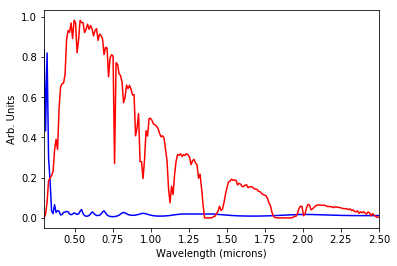

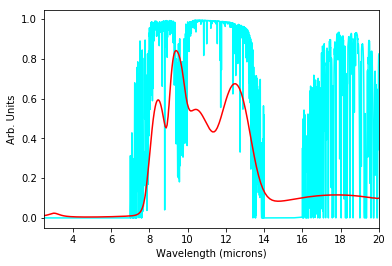

63.797723437818135


In [3]:
### Import WPTHERML class!
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
import numpy as np
### Define structure!

structure = {

        'Material_List': ['Air', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'Ag', 'Air'],
        'Thickness_List': [0, 230e-9, 485e-9, 688e-9, 13e-9, 73e-9, 34e-9, 54e-9, 200e-9, 0],
        'Lambda_List': [300e-9, 20000e-9, 2000],
        'EXPLICIT_ANGLE': 1,
        'COOLING': 1
     
        }

### create instance of multilayer class - results will be computed automatically
w_slab = multilayer(structure)
print(w_slab.cooling_power_val)


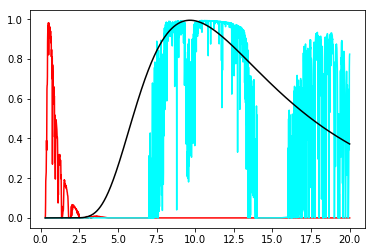

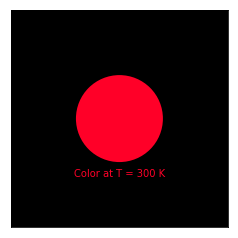

1

In [6]:
BB = datalib.BB(w_slab.lambda_array, w_slab.T_ml)
AM = datalib.AM(w_slab.lambda_array)
T_atm = datalib.ATData(w_slab.lambda_array)
plt.plot(w_slab.lambda_array*1e6, AM/(1.4*1e9), 'red', w_slab.lambda_array*1e6, T_atm, 'cyan',  w_slab.lambda_array*1e6, BB/1e7, 'black',)
plt.show()
w_slab.thermal_color()